# Switch Analysis

## Questions to Consider:
1. Are accounts containing a Switch more profitable?
2. How does subscription length differ between Switch and Non-Switch Accounts?
3. Which items are most often switched from and switched to?
4. Which active non-switch customers should be targeted for a subscription switch?

## Import and Preview Data

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Import subsscription and products table
sub_df = pd.read_csv('Data_Analytics_Exercise_Data.csv')
prod_df = pd.read_csv('Viewable_Products.csv')

In [3]:
#Preview subscription dataframe
sub_df.head()

,id,viewable_product_id,created_at,quantity,user_id,removed_at,created_by_client_type,removed_by_client_type
0,1493735,511,7/28/16 12:34,1,36867,NaN,www,NaN
1,1607724,490,8/28/16 19:00,1,42060,NaN,www,NaN
2,1539095,511,8/10/16 20:02,1,52992,12/5/16 21:31,www,www
3,1515988,511,8/4/16 12:47,1,65654,9/12/16 11:20,www,www
4,1495173,511,7/28/16 19:49,1,95304,NaN,www,NaN


In [4]:
#Preview product dataframe
prod_df.head()

,abbrev,viewable_product_id,price,starter_set_count,other_set_count,blade_count,handle_count,shave_gel_count,shave_cream_count,face_wash_count,aftershave_count,lipbalm_count,razorstand_count,face_lotion_count,travel_kit_count
0,ShaveCream,110,$8.00,0,0,0,0,0,1,0,0,0,0,0,0
1,ShaveCream,120,$12.00,0,0,0,0,0,1,0,0,0,0,0,0
2,DailyFaceWash,318,$7.00,0,0,0,0,0,0,1,0,0,0,0,0
3,DailyFaceLotionSPF15,446,$8.00,0,0,0,0,0,0,0,0,0,0,1,0
4,HarrysBlades,488,$8.00,0,0,4,0,0,0,0,0,0,0,0,0


In [5]:
#View Dataypes
sub_df.dtypes

id                         int64
viewable_product_id        int64
created_at                object
quantity                   int64
user_id                    int64
removed_at                object
created_by_client_type    object
removed_by_client_type    object
dtype: object

In [6]:
#View columns
print(sub_df.columns)

Index(['id', 'viewable_product_id', 'created_at', 'quantity', 'user_id',
       'removed_at', 'created_by_client_type', 'removed_by_client_type'],
      dtype='object')


In [7]:
#View Dataypes
prod_df.dtypes

        abbrev            object
 viewable_product_id      object
  price                   object
 starter_set_count        object
 other_set_count          object
 blade_count              object
 handle_count             object
 shave_gel_count          object
 shave_cream_count        object
 face_wash_count          object
 aftershave_count         object
 lipbalm_count            object
 razorstand_count         object
 face_lotion_count        object
 travel_kit_count         object
dtype: object

In [8]:
#View columns
print(prod_df.columns)

Index(['        abbrev        ', ' viewable_product_id ', '  price  ',
       ' starter_set_count ', ' other_set_count ', ' blade_count ',
       ' handle_count ', ' shave_gel_count ', ' shave_cream_count ',
       ' face_wash_count ', ' aftershave_count ', ' lipbalm_count ',
       ' razorstand_count ', ' face_lotion_count ', ' travel_kit_count '],
      dtype='object')


## Clean Data

In [9]:
#Remove leading and trailing spaces from columns
prod_df.columns = prod_df.columns.str.strip()
print(prod_df.columns)

Index(['abbrev', 'viewable_product_id', 'price', 'starter_set_count',
       'other_set_count', 'blade_count', 'handle_count', 'shave_gel_count',
       'shave_cream_count', 'face_wash_count', 'aftershave_count',
       'lipbalm_count', 'razorstand_count', 'face_lotion_count',
       'travel_kit_count'],
      dtype='object')


In [10]:
#Change datatypes as needed and remove $ from price.
prod_df['viewable_product_id'] = prod_df.viewable_product_id.astype(int)
prod_df['price'] = prod_df['price'].replace({'\$':''}, regex = True)
prod_df['price'] = prod_df.price.astype(float)

In [11]:
#Check for null values
sub_df.isna().sum()

id                           0
viewable_product_id          0
created_at                   0
quantity                     0
user_id                      0
removed_at                6372
created_by_client_type       0
removed_by_client_type    6449
dtype: int64

In [12]:
#Drop unnecessary columns for this analysis
sub_df = sub_df.drop(columns=['created_by_client_type', 'removed_by_client_type'])
sub_df

,id,viewable_product_id,created_at,quantity,user_id,removed_at
0,1493735,511,7/28/16 12:34,1,36867,NaN
1,1607724,490,8/28/16 19:00,1,42060,NaN
2,1539095,511,8/10/16 20:02,1,52992,12/5/16 21:31
3,1515988,511,8/4/16 12:47,1,65654,9/12/16 11:20
4,1495173,511,7/28/16 19:49,1,95304,NaN
...,...,...,...,...,...,...
9962,1607498,488,8/28/16 18:12,1,2698422,NaN
9963,1607862,488,8/28/16 19:32,1,2698827,10/9/16 19:33
9964,1608561,511,8/28/16 22:50,1,2699867,NaN
9965,1616909,511,8/31/16 11:49,1,2710428,NaN


In [13]:
#Change removed_at field to Last_Active_Date 
#Fill null values with today's date. (02/02/2017 - date spreadsheet was created)
#today = pd.to_datetime('today').normalize()
today = pd.to_datetime('2017-02-02').normalize()
sub_df = sub_df.fillna(today)
sub_df = sub_df.rename(columns={'removed_at':'Last_Active_Date'})
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date
0,1493735,511,7/28/16 12:34,1,36867,2017-02-02 00:00:00
1,1607724,490,8/28/16 19:00,1,42060,2017-02-02 00:00:00
2,1539095,511,8/10/16 20:02,1,52992,12/5/16 21:31
3,1515988,511,8/4/16 12:47,1,65654,9/12/16 11:20
4,1495173,511,7/28/16 19:49,1,95304,2017-02-02 00:00:00
...,...,...,...,...,...,...
9962,1607498,488,8/28/16 18:12,1,2698422,2017-02-02 00:00:00
9963,1607862,488,8/28/16 19:32,1,2698827,10/9/16 19:33
9964,1608561,511,8/28/16 22:50,1,2699867,2017-02-02 00:00:00
9965,1616909,511,8/31/16 11:49,1,2710428,2017-02-02 00:00:00


In [14]:
#Convert 'created_at' and 'removed_at' columns to datetime datetype and remove time.
sub_df['created_at'] = pd.to_datetime(sub_df['created_at']).dt.date
sub_df['Last_Active_Date'] = pd.to_datetime(sub_df['Last_Active_Date']).dt.date
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date
0,1493735,511,2016-07-28,1,36867,2017-02-02
1,1607724,490,2016-08-28,1,42060,2017-02-02
2,1539095,511,2016-08-10,1,52992,2016-12-05
3,1515988,511,2016-08-04,1,65654,2016-09-12
4,1495173,511,2016-07-28,1,95304,2017-02-02
...,...,...,...,...,...,...
9962,1607498,488,2016-08-28,1,2698422,2017-02-02
9963,1607862,488,2016-08-28,1,2698827,2016-10-09
9964,1608561,511,2016-08-28,1,2699867,2017-02-02
9965,1616909,511,2016-08-31,1,2710428,2017-02-02


In [15]:
#Find subscription length in days.
sub_df['Sub_Length'] = sub_df['Last_Active_Date'] - sub_df['created_at']
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date,Sub_Length
0,1493735,511,2016-07-28,1,36867,2017-02-02,189 days
1,1607724,490,2016-08-28,1,42060,2017-02-02,158 days
2,1539095,511,2016-08-10,1,52992,2016-12-05,117 days
3,1515988,511,2016-08-04,1,65654,2016-09-12,39 days
4,1495173,511,2016-07-28,1,95304,2017-02-02,189 days
...,...,...,...,...,...,...,...
9962,1607498,488,2016-08-28,1,2698422,2017-02-02,158 days
9963,1607862,488,2016-08-28,1,2698827,2016-10-09,42 days
9964,1608561,511,2016-08-28,1,2699867,2017-02-02,158 days
9965,1616909,511,2016-08-31,1,2710428,2017-02-02,155 days


In [16]:
#Change Sub_Length to an integer and calculate Sub Months rounding up to nearest whole number.
sub_df['Sub_Length'] = sub_df['Sub_Length'].dt.days.astype('int16')
sub_df['Sub_Length_Months'] = np.ceil(sub_df['Sub_Length']/30)
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date,Sub_Length,Sub_Length_Months
0,1493735,511,2016-07-28,1,36867,2017-02-02,189,7.0
1,1607724,490,2016-08-28,1,42060,2017-02-02,158,6.0
2,1539095,511,2016-08-10,1,52992,2016-12-05,117,4.0
3,1515988,511,2016-08-04,1,65654,2016-09-12,39,2.0
4,1495173,511,2016-07-28,1,95304,2017-02-02,189,7.0
...,...,...,...,...,...,...,...,...
9962,1607498,488,2016-08-28,1,2698422,2017-02-02,158,6.0
9963,1607862,488,2016-08-28,1,2698827,2016-10-09,42,2.0
9964,1608561,511,2016-08-28,1,2699867,2017-02-02,158,6.0
9965,1616909,511,2016-08-31,1,2710428,2017-02-02,155,6.0


In [17]:
#Add field sub_error if Last_Active_Date is less than 3 days from created_at field.
def sub_error(sub_df):
    if sub_df['Sub_Length'] < 3:
        val = 'Yes'
    else:
        val = 'No'
    return val

sub_df['sub_error'] = sub_df.apply(sub_error, axis=1)
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date,Sub_Length,Sub_Length_Months,sub_error
0,1493735,511,2016-07-28,1,36867,2017-02-02,189,7.0,No
1,1607724,490,2016-08-28,1,42060,2017-02-02,158,6.0,No
2,1539095,511,2016-08-10,1,52992,2016-12-05,117,4.0,No
3,1515988,511,2016-08-04,1,65654,2016-09-12,39,2.0,No
4,1495173,511,2016-07-28,1,95304,2017-02-02,189,7.0,No
...,...,...,...,...,...,...,...,...,...
9962,1607498,488,2016-08-28,1,2698422,2017-02-02,158,6.0,No
9963,1607862,488,2016-08-28,1,2698827,2016-10-09,42,2.0,No
9964,1608561,511,2016-08-28,1,2699867,2017-02-02,158,6.0,No
9965,1616909,511,2016-08-31,1,2710428,2017-02-02,155,6.0,No


In [18]:
#Remove subscription errors from dataframe
sub_df = sub_df[sub_df['sub_error']=='No']
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date,Sub_Length,Sub_Length_Months,sub_error
0,1493735,511,2016-07-28,1,36867,2017-02-02,189,7.0,No
1,1607724,490,2016-08-28,1,42060,2017-02-02,158,6.0,No
2,1539095,511,2016-08-10,1,52992,2016-12-05,117,4.0,No
3,1515988,511,2016-08-04,1,65654,2016-09-12,39,2.0,No
4,1495173,511,2016-07-28,1,95304,2017-02-02,189,7.0,No
...,...,...,...,...,...,...,...,...,...
9962,1607498,488,2016-08-28,1,2698422,2017-02-02,158,6.0,No
9963,1607862,488,2016-08-28,1,2698827,2016-10-09,42,2.0,No
9964,1608561,511,2016-08-28,1,2699867,2017-02-02,158,6.0,No
9965,1616909,511,2016-08-31,1,2710428,2017-02-02,155,6.0,No


In [19]:
#Drop sub_error column
sub_df = sub_df.drop(columns=['sub_error'])
sub_df

,id,viewable_product_id,created_at,quantity,user_id,Last_Active_Date,Sub_Length,Sub_Length_Months
0,1493735,511,2016-07-28,1,36867,2017-02-02,189,7.0
1,1607724,490,2016-08-28,1,42060,2017-02-02,158,6.0
2,1539095,511,2016-08-10,1,52992,2016-12-05,117,4.0
3,1515988,511,2016-08-04,1,65654,2016-09-12,39,2.0
4,1495173,511,2016-07-28,1,95304,2017-02-02,189,7.0
...,...,...,...,...,...,...,...,...
9962,1607498,488,2016-08-28,1,2698422,2017-02-02,158,6.0
9963,1607862,488,2016-08-28,1,2698827,2016-10-09,42,2.0
9964,1608561,511,2016-08-28,1,2699867,2017-02-02,158,6.0
9965,1616909,511,2016-08-31,1,2710428,2017-02-02,155,6.0


In [20]:
#Add Status column, active if Last_Active_Date is equal to 'today'
def status(sub_df):
    if sub_df['Last_Active_Date'] == today:
        val = 'Active'
    else:
        val = 'Inactive'
    return val

sub_df['Status'] = sub_df.apply(status, axis=1)

In [21]:
#Check count of status.
sub_df['Status'].value_counts()

Active      6357
Inactive    3066
Name: Status, dtype: int64

In [22]:
#Find minimum Last_Active_Date grouped by user_id.
df = sub_df.groupby(['user_id'])['Last_Active_Date'].min()

In [23]:
#Merge df and sub_df dataframes.
sub_df = pd.merge(df, sub_df, on='user_id')
sub_df

,user_id,Last_Active_Date_x,id,viewable_product_id,created_at,quantity,Last_Active_Date_y,Sub_Length,Sub_Length_Months,Status
0,968,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active
1,5404,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active
2,7938,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive
3,17951,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive
4,17951,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active
...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active
9419,2710428,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active
9420,2710428,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active
9421,2711267,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive


In [24]:
#Rename Last_Active_Date columns.
sub_df = sub_df.rename(columns={'Last_Active_Date_x':'First_Sub_End', 'Last_Active_Date_y':'Last_Active_Date'})
sub_df

,user_id,First_Sub_End,id,viewable_product_id,created_at,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,Status
0,968,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active
1,5404,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active
2,7938,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive
3,17951,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive
4,17951,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active
...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active
9419,2710428,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active
9420,2710428,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active
9421,2711267,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive


In [25]:
#Create Switch_To column equal to Yes if First_Sub_End is less than or equal to created_at.
def switch_to(sub_df):
    if sub_df['First_Sub_End'] <= sub_df['created_at']:
        val = 'Yes'
    else:
        val = 'No'
    return val

sub_df['Switch_To'] = sub_df.apply(switch_to, axis=1)

In [26]:
#Preview new column.
sub_df

,user_id,First_Sub_End,id,viewable_product_id,created_at,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,Status,Switch_To
0,968,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active,No
1,5404,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active,No
2,7938,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive,No
3,17951,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive,No
4,17951,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active,Yes
...,...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active,No
9419,2710428,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active,No
9420,2710428,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active,No
9421,2711267,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive,No


In [27]:
#Find maximum created_at grouped by user_id.
df1 = sub_df.groupby(['user_id'])['created_at'].max()
df1

user_id
968        2016-08-01
5404       2016-08-07
7938       2016-07-26
17951      2017-01-20
19323      2016-07-25
              ...    
2707014    2016-08-30
2708529    2016-08-30
2710428    2016-08-31
2711267    2016-08-31
2711498    2016-08-31
Name: created_at, Length: 7690, dtype: object

In [28]:
#Merge df1 and sub_df dataframes.
sub_df = pd.merge(df1, sub_df, on='user_id')
sub_df

,user_id,created_at_x,First_Sub_End,id,viewable_product_id,created_at_y,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,Status,Switch_To
0,968,2016-08-01,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active,No
1,5404,2016-08-07,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active,No
2,7938,2016-07-26,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive,No
3,17951,2017-01-20,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive,No
4,17951,2017-01-20,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2016-08-30,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active,No
9419,2710428,2016-08-31,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active,No
9420,2710428,2016-08-31,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active,No
9421,2711267,2016-08-31,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive,No


In [29]:
#Rename created_at columns.
sub_df = sub_df.rename(columns={'created_at_x':'Additional_Sub_Start', 'created_at_y':'created_at'})
sub_df

,user_id,Additional_Sub_Start,First_Sub_End,id,viewable_product_id,created_at,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,Status,Switch_To
0,968,2016-08-01,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active,No
1,5404,2016-08-07,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active,No
2,7938,2016-07-26,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive,No
3,17951,2017-01-20,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive,No
4,17951,2017-01-20,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2016-08-30,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active,No
9419,2710428,2016-08-31,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active,No
9420,2710428,2016-08-31,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active,No
9421,2711267,2016-08-31,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive,No


In [30]:
#Create Switch_From column equal to Yes if Last_Active_Date is less than or equal to Additional_Sub_Start.
def switch_from(sub_df):
    if sub_df['Last_Active_Date'] <= sub_df['Additional_Sub_Start']:
        val = 'Yes'
    else:
        val = 'No'
    return val

sub_df['Switch_From'] = sub_df.apply(switch_from, axis=1)

In [31]:
#Preview new column.
sub_df

,user_id,Additional_Sub_Start,First_Sub_End,id,viewable_product_id,created_at,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,Status,Switch_To,Switch_From
0,968,2016-08-01,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active,No,No
1,5404,2016-08-07,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active,No,No
2,7938,2016-07-26,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive,No,No
3,17951,2017-01-20,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive,No,Yes
4,17951,2017-01-20,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2016-08-30,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active,No,No
9419,2710428,2016-08-31,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active,No,No
9420,2710428,2016-08-31,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active,No,No
9421,2711267,2016-08-31,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive,No,No


In [32]:
#Create column called Switch if Switch_To or Switch_From is Yes.
def switch(sub_df):
    if sub_df['Switch_To'] == "Yes":
        val = 'Yes'
    elif sub_df['Switch_From'] == "Yes":
        val = 'Yes'
    else:
        val = 'No'
    return val

sub_df['Switch'] = sub_df.apply(switch, axis=1)

In [33]:
#Preview new column.
sub_df

,user_id,Additional_Sub_Start,First_Sub_End,id,viewable_product_id,created_at,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,Status,Switch_To,Switch_From,Switch
0,968,2016-08-01,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,Active,No,No,No
1,5404,2016-08-07,2017-02-02,1526753,504,2016-08-07,1,2017-02-02,179,6.0,Active,No,No,No
2,7938,2016-07-26,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,Inactive,No,No,No
3,17951,2017-01-20,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,Inactive,No,Yes,Yes
4,17951,2017-01-20,2017-01-20,2050418,110,2017-01-20,1,2017-02-02,13,1.0,Active,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2708529,2016-08-30,2017-02-02,1615550,488,2016-08-30,1,2017-02-02,156,6.0,Active,No,No,No
9419,2710428,2016-08-31,2017-02-02,1616909,511,2016-08-31,1,2017-02-02,155,6.0,Active,No,No,No
9420,2710428,2016-08-31,2017-02-02,1616918,511,2016-08-31,1,2017-02-02,155,6.0,Active,No,No,No
9421,2711267,2016-08-31,2016-10-19,1617811,511,2016-08-31,1,2016-10-19,49,2.0,Inactive,No,No,No


In [34]:
#View count by Switch classification.
sub_df['Switch'].value_counts()

No     7309
Yes    2114
Name: Switch, dtype: int64

In [35]:
#Merge sub_df and prod_df.
final_df = pd.merge(sub_df, prod_df, on='viewable_product_id')
final_df

,user_id,Additional_Sub_Start,First_Sub_End,id,viewable_product_id,created_at,quantity,Last_Active_Date,Sub_Length,Sub_Length_Months,...,blade_count,handle_count,shave_gel_count,shave_cream_count,face_wash_count,aftershave_count,lipbalm_count,razorstand_count,face_lotion_count,travel_kit_count
0,968,2016-08-01,2017-02-02,1507701,511,2016-08-01,1,2017-02-02,185,7.0,...,8,0,0,0,0,0,0,0,0,0
1,7938,2016-07-26,2016-11-08,1489315,511,2016-07-26,1,2016-11-08,105,4.0,...,8,0,0,0,0,0,0,0,0,0
2,17951,2017-01-20,2017-01-20,1526391,511,2016-08-07,1,2017-01-20,166,6.0,...,8,0,0,0,0,0,0,0,0,0
3,19323,2016-07-25,2017-02-02,1447565,511,2016-07-22,1,2017-02-02,195,7.0,...,8,0,0,0,0,0,0,0,0,0
4,19323,2016-07-25,2017-02-02,1482407,511,2016-07-25,1,2017-02-02,192,7.0,...,8,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2580264,2016-08-21,2016-08-21,1575221,515,2016-08-21,1,2016-12-12,113,4.0,...,0,0,0,0,0,1,0,0,0,0
9419,2585953,2016-11-03,2016-08-22,1581597,515,2016-08-23,1,2016-11-03,72,3.0,...,0,0,0,0,0,1,0,0,0,0
9420,2586819,2016-08-30,2016-08-20,1573461,515,2016-08-20,1,2016-08-28,8,1.0,...,0,0,0,0,0,1,0,0,0,0
9421,2592480,2016-12-21,2016-08-23,1581707,515,2016-08-23,1,2016-12-21,120,4.0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
#Drop unnecessary columns.
final_df = final_df.drop(columns=['Additional_Sub_Start', 'First_Sub_End', 'created_at', 'Last_Active_Date', 
        'starter_set_count','other_set_count', 'blade_count', 'handle_count', 'shave_gel_count',
        'shave_cream_count', 'face_wash_count', 'aftershave_count','lipbalm_count', 'razorstand_count', 
        'face_lotion_count', 'travel_kit_count'])
final_df

,user_id,id,viewable_product_id,quantity,Sub_Length,Sub_Length_Months,Status,Switch_To,Switch_From,Switch,abbrev,price
0,968,1507701,511,1,185,7.0,Active,No,No,No,BladesPlan,15.0
1,7938,1489315,511,1,105,4.0,Inactive,No,No,No,BladesPlan,15.0
2,17951,1526391,511,1,166,6.0,Inactive,No,Yes,Yes,BladesPlan,15.0
3,19323,1447565,511,1,195,7.0,Active,No,No,No,BladesPlan,15.0
4,19323,1482407,511,1,192,7.0,Active,No,No,No,BladesPlan,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2580264,1575221,515,1,113,4.0,Inactive,Yes,No,Yes,PostShaveBalm,8.0
9419,2585953,1581597,515,1,72,3.0,Inactive,Yes,Yes,Yes,PostShaveBalm,8.0
9420,2586819,1573461,515,1,8,1.0,Inactive,Yes,Yes,Yes,PostShaveBalm,8.0
9421,2592480,1581707,515,1,120,4.0,Inactive,Yes,Yes,Yes,PostShaveBalm,8.0


## Analyze Data

In [37]:
#Calculate subscription profit.
final_df['Profit'] = final_df['quantity'] * final_df['Sub_Length_Months'] * final_df['price']
final_df

,user_id,id,viewable_product_id,quantity,Sub_Length,Sub_Length_Months,Status,Switch_To,Switch_From,Switch,abbrev,price,Profit
0,968,1507701,511,1,185,7.0,Active,No,No,No,BladesPlan,15.0,105.0
1,7938,1489315,511,1,105,4.0,Inactive,No,No,No,BladesPlan,15.0,60.0
2,17951,1526391,511,1,166,6.0,Inactive,No,Yes,Yes,BladesPlan,15.0,90.0
3,19323,1447565,511,1,195,7.0,Active,No,No,No,BladesPlan,15.0,105.0
4,19323,1482407,511,1,192,7.0,Active,No,No,No,BladesPlan,15.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,2580264,1575221,515,1,113,4.0,Inactive,Yes,No,Yes,PostShaveBalm,8.0,32.0
9419,2585953,1581597,515,1,72,3.0,Inactive,Yes,Yes,Yes,PostShaveBalm,8.0,24.0
9420,2586819,1573461,515,1,8,1.0,Inactive,Yes,Yes,Yes,PostShaveBalm,8.0,8.0
9421,2592480,1581707,515,1,120,4.0,Inactive,Yes,Yes,Yes,PostShaveBalm,8.0,32.0


In [38]:
#Query Switch classifications by profit and subscription length.
profit_df = final_df.groupby(['user_id', 'Switch']).agg({'Profit': 'sum', 'Sub_Length_Months':'sum'})
profit_df.columns = ['Sum_Profit', 'Sum_Months']
profit_df = profit_df.reset_index()
profit_df

,user_id,Switch,Sum_Profit,Sum_Months
0,968,No,105.0,7.0
1,5404,No,162.0,6.0
2,7938,No,60.0,4.0
3,17951,Yes,98.0,7.0
4,19323,No,210.0,14.0
...,...,...,...,...
7695,2707014,No,84.0,12.0
7696,2708529,No,48.0,6.0
7697,2710428,No,180.0,12.0
7698,2711267,No,30.0,2.0


In [39]:
#Analyze Switch classifications by mean profit and mean subscription length.
final_profit = profit_df.groupby(['Switch']).agg({'Sum_Profit':'mean', 'Sum_Months':'mean'})
final_profit.columns = ['Mean_Profit', 'Mean_Months']
final_profit = final_profit.reset_index()
final_profit

,Switch,Mean_Profit,Mean_Months
0,No,94.158748,6.011913
1,Yes,139.122783,8.980900


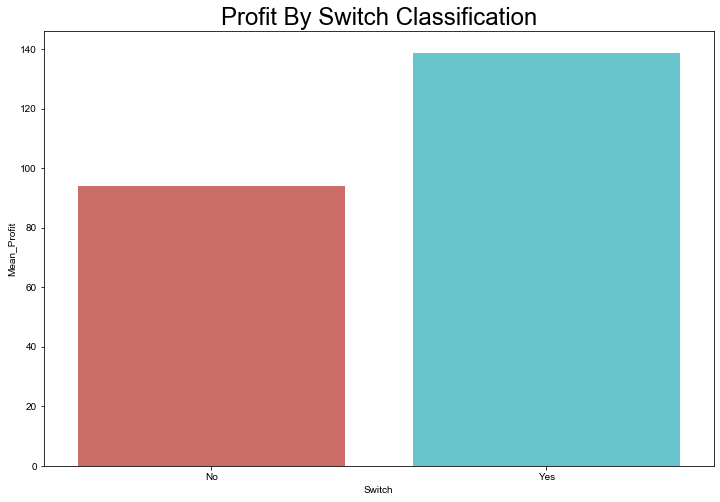

In [40]:
#Visualize Profitability by Switch classification.
fig, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale = 2)
sns.barplot(x = 'Switch', y = 'Mean_Profit', ax=ax, data = final_profit,
            palette = 'hls').set(title='Profit By Switch Classification')
plt.savefig('Switch_Profit');

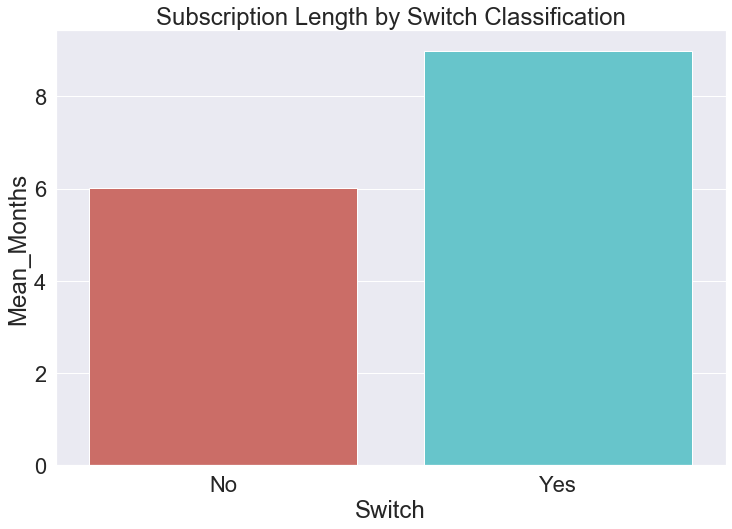

In [41]:
#Visualize subscription length by Switch classification.
fig, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale = 2)
sns.barplot(x = 'Switch', y = 'Mean_Months', ax=ax, data = final_profit,
            palette = 'hls').set(title='Subscription Length by Switch Classification')
plt.savefig('Switch_Length');

User accounts containing a switch are more than $45 more profitable on average and remain a customer for an additional 3 months. It is clear that customers who switch subscriptions are adding value compared to those who are not. From here we will analyze which items are most commonly switched from and switched to.

In [42]:
#Query Switch_To to find product most often switched to. 
switch_to = final_df.groupby(['Switch_To', 'viewable_product_id'])['id'].count()
switch_to = switch_to.reset_index()
switch_to = switch_to[switch_to['Switch_To'] == 'Yes']
switch_to = pd.merge(switch_to, prod_df, on='viewable_product_id')
switch_to["Product"] = switch_to['viewable_product_id'].astype(str) +"-"+ switch_to['abbrev']
switch_to = switch_to.rename(columns={'id':'Count of Switches To'})
switch_to = switch_to[switch_to['Count of Switches To'] > 40]
switch_to

,Switch_To,viewable_product_id,Count of Switches To,abbrev,price,starter_set_count,other_set_count,blade_count,handle_count,shave_gel_count,shave_cream_count,face_wash_count,aftershave_count,lipbalm_count,razorstand_count,face_lotion_count,travel_kit_count,Product
0,Yes,110,65,ShaveCream,8.0,0,0,0,0,0,1,0,0,0,0,0,0,110- ShaveCream
1,Yes,318,42,DailyFaceWash,7.0,0,0,0,0,0,0,1,0,0,0,0,0,318- DailyFaceWash
6,Yes,504,78,Blades2GelsPlan,27.0,0,0,8,0,2,0,0,0,0,0,0,0,504- Blades2GelsPlan
8,Yes,506,133,FoamingShaveGel,6.0,0,0,0,0,1,0,0,0,0,0,0,0,506- FoamingShaveGel
10,Yes,508,114,PostShaveBalm,5.0,0,0,0,0,0,0,0,1,0,0,0,0,508- PostShaveBalm
11,Yes,511,440,BladesPlan,15.0,0,0,8,0,0,0,0,0,0,0,0,0,511- BladesPlan
12,Yes,514,251,Blades1GelPlan,21.0,0,0,8,0,1,0,0,0,0,0,0,0,514- Blades1GelPlan


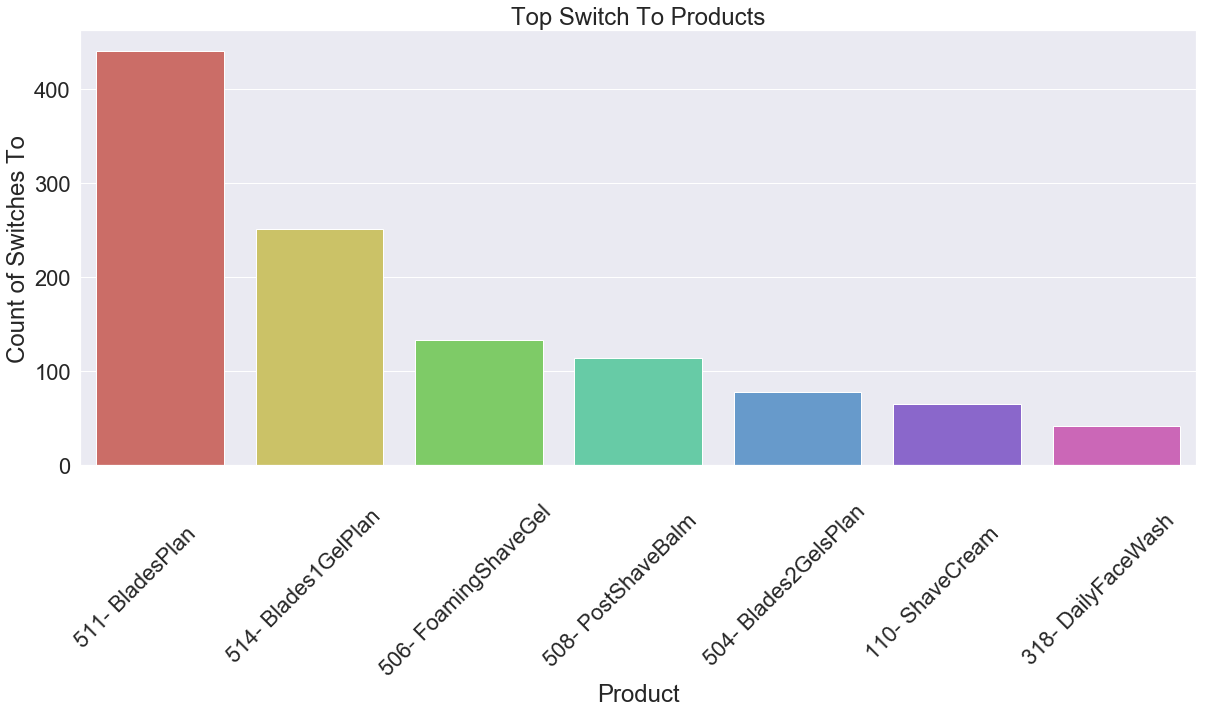

In [43]:
#Visualize Switch_To counts.
fig, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)
sns.set(font_scale = 2)
sns.barplot(x = 'Product', y = 'Count of Switches To', ax=ax, data = switch_to,
            order=switch_to.sort_values('Count of Switches To', ascending=False).Product,
            palette = 'hls').set(title='Top Switch To Products')
plt.savefig('Switch_To',bbox_inches="tight");

Items 511 - BladesPlan, 514 - Blades1GelPlan, and 506 - FoamingShaveGel are the three items most commonly switched to. We'll now take a look at the items most commonly switched from to see how they compare with one another.

In [44]:
#Query Switch_From to find product most often switched from. 
switch_from = final_df.groupby(['Switch_From', 'viewable_product_id'])['id'].count()
switch_from = switch_from.reset_index()
switch_from = switch_from[switch_from['Switch_From'] == 'Yes']
switch_from = pd.merge(switch_from, prod_df, on='viewable_product_id')
switch_from["Product"] = switch_from['viewable_product_id'].astype(str) +"-"+ switch_from['abbrev']
switch_from = switch_from.rename(columns={'id':'Count of Switches From'})
switch_from = switch_from[switch_from['Count of Switches From'] > 40]
switch_from

,Switch_From,viewable_product_id,Count of Switches From,abbrev,price,starter_set_count,other_set_count,blade_count,handle_count,shave_gel_count,shave_cream_count,face_wash_count,aftershave_count,lipbalm_count,razorstand_count,face_lotion_count,travel_kit_count,Product
0,Yes,110,42,ShaveCream,8.0,0,0,0,0,0,1,0,0,0,0,0,0,110- ShaveCream
7,Yes,504,207,Blades2GelsPlan,27.0,0,0,8,0,2,0,0,0,0,0,0,0,504- Blades2GelsPlan
9,Yes,506,74,FoamingShaveGel,6.0,0,0,0,0,1,0,0,0,0,0,0,0,506- FoamingShaveGel
11,Yes,508,67,PostShaveBalm,5.0,0,0,0,0,0,0,0,1,0,0,0,0,508- PostShaveBalm
12,Yes,511,517,BladesPlan,15.0,0,0,8,0,0,0,0,0,0,0,0,0,511- BladesPlan
13,Yes,514,81,Blades1GelPlan,21.0,0,0,8,0,1,0,0,0,0,0,0,0,514- Blades1GelPlan


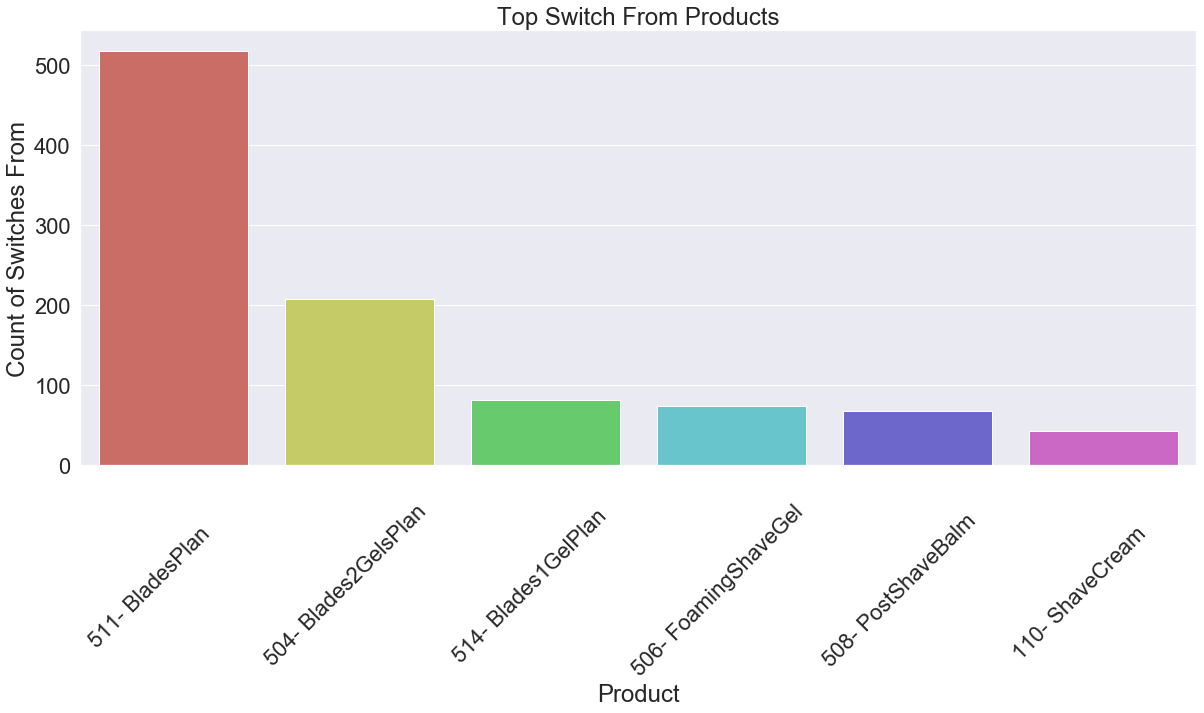

In [45]:
#Visualize Switch_From counts.
fig, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=45)
sns.set(font_scale = 2)
sns.barplot(x = 'Product', y = 'Count of Switches From', ax=ax, data = switch_from, 
            order=switch_from.sort_values('Count of Switches From', ascending=False).Product,
            palette = 'hls').set(title='Top Switch From Products')
plt.savefig('Switch_From',bbox_inches="tight");

The items switched from most often are 511 - BladesPlan, 504 - Blades2GelsPlan and 514 - Blades1GelPlan. Item 511 is also the most commonly switched to item; however, item 504 is switched from twice as often as it is switched to. Contrastingly, item 514 is switched to over three times more than it is switched from. Perhaps advertising item 514 to the aging 504 subscriptions would lead to a profitable switch.

In [46]:
#Find median subscription length for Non-Switch subscriptions. Use median to minimize outlier impact.
sub_cancel = final_df.groupby(['Status', 'Switch']).agg({'Sub_Length_Months' : 'median'})
sub_cancel = sub_cancel.reset_index()
sub_cancel = sub_cancel[sub_cancel['Status'] == 'Inactive']
sub_cancel = sub_cancel[sub_cancel['Switch'] == 'No']
sub_cancel

,Status,Switch,Sub_Length_Months
2,Inactive,No,4.0


In [67]:
sfl_df = final_df.groupby(['Switch_From']).agg({'Sub_Length_Months' : 'median'})
sfl_df = sfl_df.reset_index()
sfl_df = sfl_df[sfl_df['Switch_From'] == 'Yes']
sfl_df

,Switch_From,Sub_Length_Months
1,Yes,2.0


In [71]:
#Find ative subscribers, non-switch subscribers whose subscription length is greater than or equal to 2 months and less than 6 months.
contact_list = final_df[(final_df['Sub_Length_Months'] >= 2) & (final_df['Sub_Length_Months'] <= 5)]
contact_list = contact_list[contact_list['Status'] == 'Active']
contact_list = contact_list[contact_list['Switch'] == 'No']
contact_list

,user_id,id,viewable_product_id,quantity,Sub_Length,Sub_Length_Months,Status,Switch_To,Switch_From,Switch,abbrev,price,Profit
73,255674,1652097,511,1,143,5.0,Active,No,No,No,BladesPlan,15.0,75.0
91,311050,1839395,511,1,81,3.0,Active,No,No,No,BladesPlan,15.0,45.0
100,340710,1805579,511,2,92,4.0,Active,No,No,No,BladesPlan,15.0,120.0
282,1037717,1658480,511,1,141,5.0,Active,No,No,No,BladesPlan,15.0,75.0
331,1256354,1806703,511,1,92,4.0,Active,No,No,No,BladesPlan,15.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,2610749,1852405,120,1,78,3.0,Active,No,No,No,ShaveCream,12.0,36.0
9365,2499576,1793099,446,1,96,4.0,Active,No,No,No,DailyFaceLotionSPF15,8.0,32.0
9366,2505770,1766918,446,1,105,4.0,Active,No,No,No,DailyFaceLotionSPF15,8.0,32.0
9402,2494810,1885490,516,1,67,3.0,Active,No,No,No,ShaveGroomPlan,28.0,84.0


## Recommendations

1. Consider options to encourage users to switch subscriptions when applicable. On average users who switch at some point are $45 more profitable and stay subscribed for 3 months longer.
2. Some items are more commonly switched from and other are more commonly switched to. I would recommend marketing other subscriptions to those aging subscriptions of product numbers 511, 504 and 514.
3. The median length of an inactive, non-switch subscription is 4 months. Subscriptions that have been active longer than 4 months should be targeted as potential switch candidates. 

## Future Work

1. Analyze active and inactive subscriptions separately to provide more accurate analysis on average subscription length and profitability.
2. Find the correlation between items and switches as well as items and profitability.
3. Remove outliers from subscription length to better determine when to target specific customers for a switch.